# **Classification of Breast Cancer using Machine Learning**

* Because of the extreme difficulty in acquiring dataset on this disease in Sierra Leone. I decided to use an assuming dataset from kaggle. So I pick this data up and do this analysis as it were in the Sierra Leonean context.

* This topic intreast me as a result of latest WHO data published in 2018 which state that Breast Cancer Deaths in Sierra Leone reached 295 or 0.37% of total deaths. The age adjusted Death Rate is 14.46 per 100,000 of population ranks Sierra Leone #116 in the world **[ICD-10 CODES: C50 - Data Source: WORLD HEALTH ORGANIZATION 2018]**. Hence In the future, I will try to develop a dataset on breast cancer based on data in Sierra Leone and use this model to examin the data


###Importing Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Loading and Viewing the dataset

In [35]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving breastCancer_dataset.csv to breastCancer_dataset (2).csv


In [37]:
df = pd.read_csv('breastCancer_dataset.csv')

#Now let’s view our dataset using head():
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,0.4467,0.7732,3.180,53.91,0.004314,0.01382,0.02254,0.01039,0.01369,0.002179,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,0.5835,1.3770,3.856,50.96,0.008805,0.03029,0.02488,0.01448,0.01486,0.005412,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,0.3063,1.0020,2.406,24.32,0.005731,0.03502,0.03553,0.01226,0.02143,0.003749,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.07217,0.07743,0.01432,0.01789,0.010080,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


##Analysing the data

Now analysing the dataset to see what is the shape of the data, how many empty values are present in the dataset, and drop those missing values using various methods provided by pandas.

In [38]:
# by counting the number of rows and columns in dataset gives:
df.shape

(569, 33)

Here i will be createing a pairplot that will show us the complete relationship between radius mean, texture mean, perimeter mean, area mean and smoothness mean on the basis of diagnosis type.

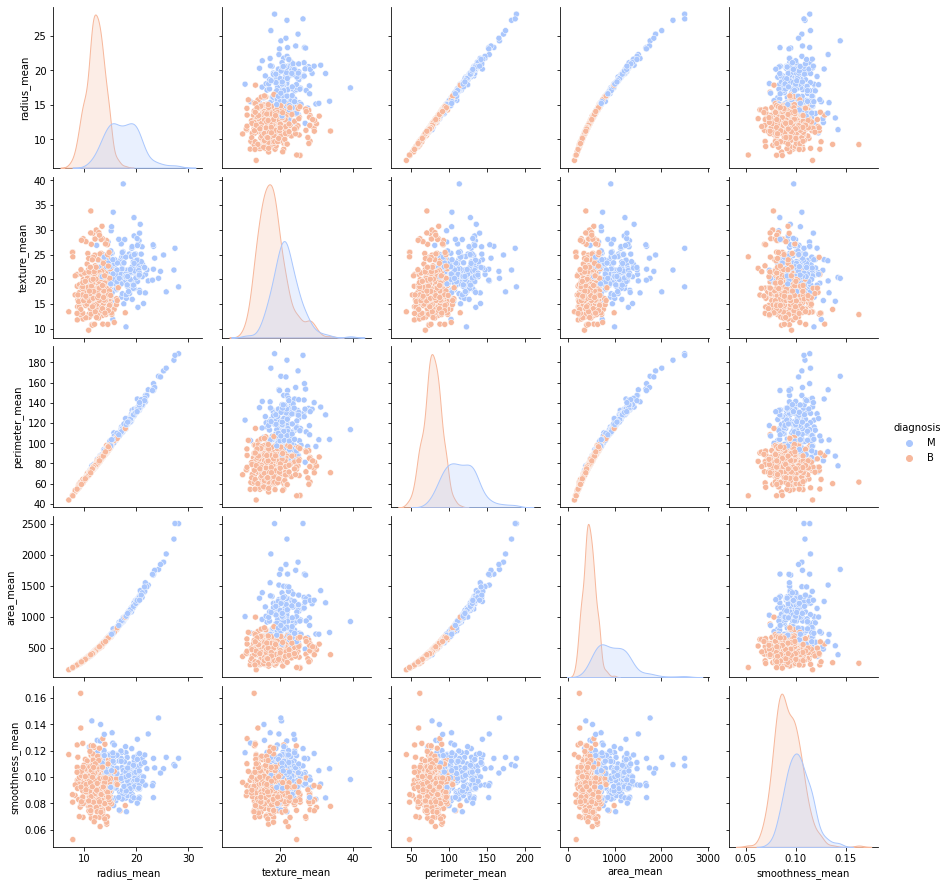

In [39]:
sns.pairplot(df,hue = 'diagnosis', palette= 'coolwarm', vars = ['radius_mean', 'texture_mean', 'perimeter_mean','area_mean','smoothness_mean'])

In [13]:
# counting the number of empty values in each columns:
df.isna().sum()

# droping the columns with all the missing values:
df = df.dropna(axis = 1)

df.shape

# Get the count of the number of Malignant(M) or Benign(B) cells
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

###Visualizing the data

Now I will visualize the diagnosis column in the dataset to see how many malignant and benign are present.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


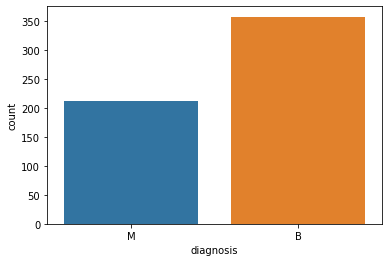

In [14]:
# visualize the count:
sns.countplot(df['diagnosis'], label = 'count')

###Prosessing the data

* In this whole analytic phase I am going to convert the data and perform some data processing so that I can build a model which can classify the type of Breast cancer using this preprocessed data.

In [15]:
# First, observing the data types to see which columns I need to be encod
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [16]:
# Renameing the diagnosis data to labels:
df = df.rename(columns = {'diagnosis' : 'label'})
print(df.dtypes)

id                           int64
label                       object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [17]:
# definding the dependent variable that need to predict(label)
y = df['label'].values
print(np.unique(y))

['B' 'M']


##Encoding Categorical Data

Now I will convert the text (B and M) to integers of (0 and 1) using LabelEncoder provided by sklearn library.

In [18]:
# Encoding categorical data from text(B and M) to integers (0 and 1)
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(y) # M = 1 and B = 0
print(np.unique(Y))

[0 1]


##Defining X

Here, X will be my main feature data which consists of all the columns except the label and id column. I will also normalize the X data using MinMaxScaler provided by sklearn library.

In [19]:
# definding x and normalize / scale value:

# definding the independent variables, Drop label and ID, and normalize other data:
X  = df.drop(labels=['label','id'],axis = 1)

#scale / normalize the values to bring them into similar range:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

print(X)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


##Splitting the data

Now spliting the data into training data and testing data using train_test_split.

In [21]:
# Split data into training and testing data to verify accuracy after fitting the model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size = 0.25, random_state=42)
print('Shape of training data is: ', x_train.shape)
print('Shape of testing data is: ', x_test.shape)

Shape of training data is:  (426, 30)
Shape of testing data is:  (143, 30)


##Creating Model

In this step, I will be creating a Sequential model with the help of TensorFlow and Keras. In the model I have created three Dense layers in which one is the input layer with 128 hidden layers and the activation function is relu, and the second layer consists of 64 hidden layers with activation function relu and the third layer is final output layer and activation function is sigmoid.

##Compile and fit ml model to the training data
* By compiling the model and viewing the summary of the model gives:

In [23]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam' , metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3968      
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation (Activation)      (None, 1)                 0         
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
____________________________________________________

###Fitting the model to see the accuracy of training data

In [24]:
# fit with no early stopping or other callbacks:
history = model.fit(x_train,y_train,verbose = 1,epochs = 100, batch_size = 64,validation_data = (x_test,y_test))

Epoch 1/100
7/7 [==============================] - 1s 31ms/step - loss: 0.6855 - accuracy: 0.6244 - val_loss: 0.6426 - val_accuracy: 0.8741
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6648 - accuracy: 0.6573 - val_loss: 0.6058 - val_accuracy: 0.9021
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.6254 - accuracy: 0.7300 - val_loss: 0.5631 - val_accuracy: 0.9161
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5638 - accuracy: 0.8239 - val_loss: 0.5103 - val_accuracy: 0.9091
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5479 - accuracy: 0.7958 - val_loss: 0.4468 - val_accuracy: 0.9231
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.4972 - accuracy: 0.8169 - val_loss: 0.3858 - val_accuracy: 0.9231
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.4356 - accuracy: 0.8568 - val_loss: 0.3285 - val_accuracy: 0.9301
Epoch 8/100
7/7 [=========

##Visualizing the training accuracy and validation accuracy
* Here i will be analyzing the training accuracy and validation accuracy and also will be plotting losses at each epoch with the help of matplotlib library.

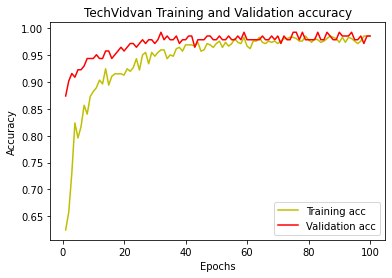

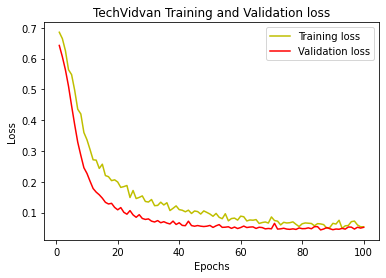

In [40]:
# plot the training and validation accuracy and loss at each epochs:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs,acc,'y',label = 'Training acc')
plt.plot(epochs,val_acc,'r',label = 'Validation acc')
plt.title('TechVidvan Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validation loss')
plt.title('TechVidvan Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

##Prediction and Visualizing the model accuracy on test data
Viewing the model prediction of test data.

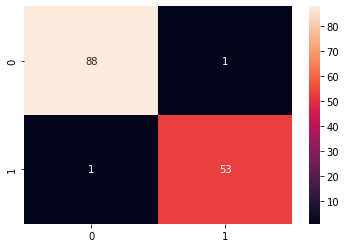

In [26]:
# Predicting the Test set results:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot = True)

I have created a Breast Cancer Classification in a way of using Neural network. The model accuracy is 98.8 % on training data and 97.9% accuracy on validation data. 

As we have also seen that the model is classifying test data very efficiently and accurately.